<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

2.0.0+cu118


## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
#surveillance
#biologie
#voiture autonome

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [ ]:
#Le modele est trop adapté au trainset donc ne se generalise pas bien

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [3]:
# - more data
# - sélectionner les variables
# data augmentation
# réduire les data engeneering
# changer d emodèle
#

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [ ]:
#done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
import torchvision
from torchvision import transforms

from torchvision.datasets import MNIST

trainset=MNIST(root=".",train=True,download=True,transform=transforms.ToTensor())

testset=MNIST(root=".",train=False,download=True,transform=transforms.ToTensor())

trainset, testset

(Dataset MNIST
     Number of datapoints: 60000
     Root location: .
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: .
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

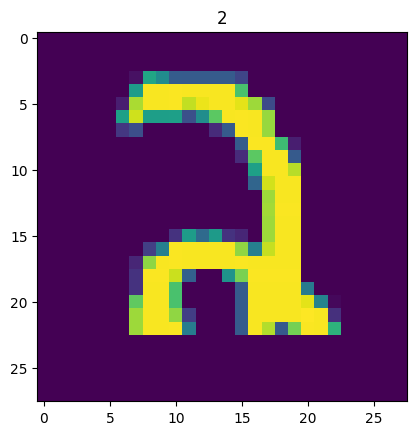

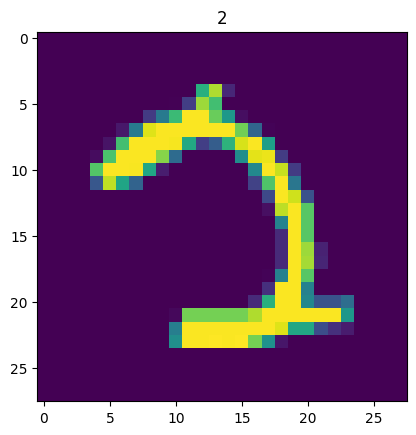

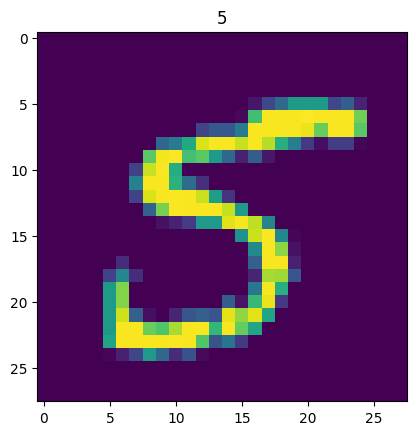

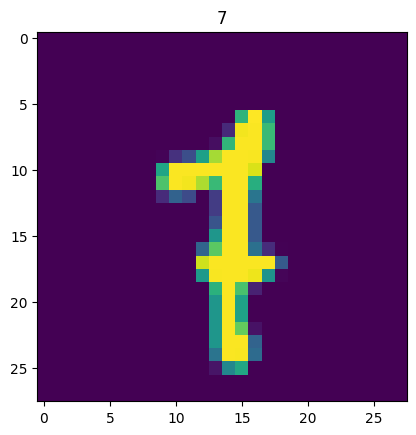

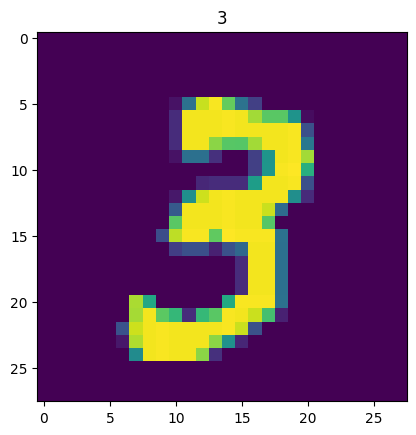

In [17]:
from random import randint
import matplotlib.pyplot as plt

for i in range(5):
    nb=randint(0,60000)
    image = trainset[nb][0]
    label= trainset[nb][1]

    plt.figure()
    plt.imshow(image.permute(1,2,0))
    plt.title(label)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [42]:
from torch.utils.data import DataLoader
import os

train_dl=DataLoader(dataset=trainset,
                    batch_size=32,
                    shuffle=True,
                    )

test_dl=DataLoader(dataset=testset,
                   batch_size=32,
                   shuffle=False,
                   )

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [43]:
from torch import nn

class TinyVGG (nn.Module):
    def __init__(self,input,hidden,output):
        super().__init__()

        self.block1 = nn.Sequential(
            nn.Conv2d(in_channels=input, 
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        ) 

        self.block2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden, 
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1), 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden,
                out_channels=hidden,
                kernel_size=3,
                stride=1,
                padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        ) 

        self.classifier=nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden*7*7,out_features=output)
        )


    def forward(self,x):
        return self.classifier(self.block2(self.block1(x)))
    


In [44]:
model = TinyVGG(input=1,hidden=10,output=10).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn=nn.CrossEntropyLoss()
model

TinyVGG(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [47]:
device

'cuda'

In [50]:
from tqdm.auto import tqdm
epochs=5

for epoch in tqdm(range(epochs)):
    
    for batch, (x,y) in enumerate(train_dl):
        x=x.to(device)
        y=y.to(device)
        model.train()
        pred=model(x)
        loss=loss_fn(pred,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.inference_mode():
        model.eval()
        for batch, (x,y) in enumerate(test_dl):
            pred_test=model(x.to(device))
            test_loss=loss_fn(pred_test,y.to(device))

    print(f"epoch n°: {epoch} | loss : {loss}  | test : {test_loss}")




 20%|██        | 1/5 [00:14<00:57, 14.31s/it]

epoch n°: 0 | loss : 0.07263310253620148  | test : 0.003438265062868595


 40%|████      | 2/5 [00:29<00:44, 14.68s/it]

epoch n°: 1 | loss : 0.008190834894776344  | test : 0.00027489973581396043


 60%|██████    | 3/5 [00:44<00:29, 14.92s/it]

epoch n°: 2 | loss : 0.005638053175061941  | test : 0.000533181126229465


 80%|████████  | 4/5 [00:59<00:14, 14.94s/it]

epoch n°: 3 | loss : 0.010126790963113308  | test : 0.00011635227565420792


100%|██████████| 5/5 [01:13<00:00, 14.79s/it]

epoch n°: 4 | loss : 0.00898896437138319  | test : 5.7600238505983725e-05


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

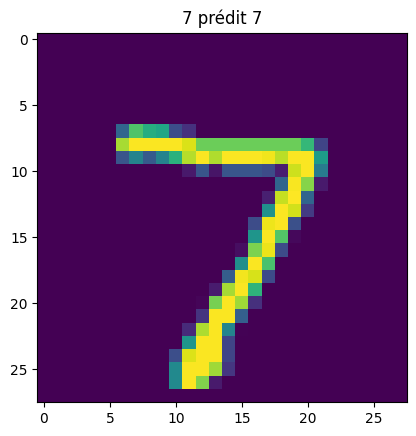

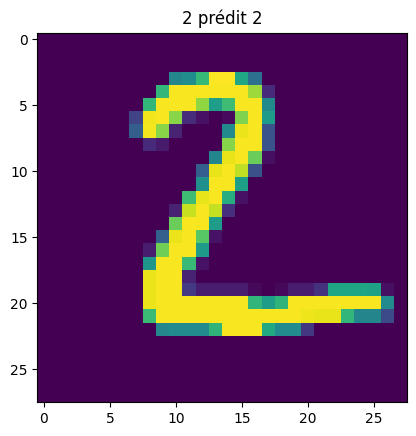

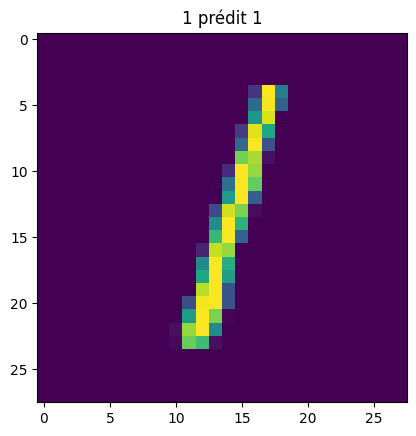

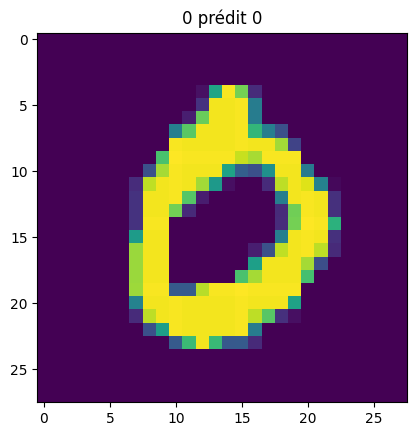

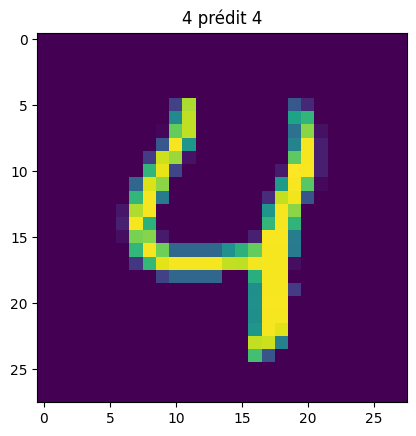

In [59]:
for i in range(5):
    image=testset[i][0]
    label=testset[i][1]

    label_logits=model(image.to(device).unsqueeze(dim=0))
    label_pred=torch.argmax(torch.softmax(label_logits,dim=1),dim=1)

    plt.figure()
    plt.imshow(image.permute(1,2,0))
    plt.title(f"{label} prédit {label_pred.item()}")

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [62]:
from torchmetrics import ConfusionMatrix
import numpy as np
from mlxtend.plotting import plot_confusion_matrix

conf_max=ConfusionMatrix(task='multiclass',num_classes=len(trainset.classes))
conf_tensor=conf_max(preds=)
plot_confusion_matrix(conf_mat=conf_max.numpy(),
                      class_names=trainset.classes)

AttributeError: 'MulticlassConfusionMatrix' object has no attribute 'numpy'

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?